# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

print(f"Monthly amount for the member's household income is {monthly_income}")

Monthly amount for the member's household income is 12000


In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
price_btc = btc_response_data['data']['1']['quotes']['USD']['price']
price_btc

40932.0

In [7]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
price_eth = eth_response_data['data']['1027']['quotes']['USD']['price']
price_eth 

2169.2

In [8]:
# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49118.40
The current value of your 5.3 ETH is $11496.76


In [9]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = (my_btc_value + my_eth_value)

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_crypto_wallet

60615.16

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

In [12]:
print(f"Alpaca key type: {type(alpaca_api_key)}")
print(f"Alpaca secret key type: {type(alpaca_secret_key)}")

Alpaca key type: <class 'str'>
Alpaca secret key type: <class 'str'>


In [13]:
base_url = 'https://paper-api.alpaca.markets/docs/'

In [14]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [15]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-04", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [16]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca_api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display Closing Prices
display(df_portfolio)

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2020-05-04 04:00:00+00:00,116.97,117.09,116.87,15546,116.89,3803239,116.960894,AGG
2020-05-04 04:00:00+00:00,283.59,283.90,279.13,460683,280.74,81813464,281.785875,SPY


In [17]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Display Reorganized Dataframe (AGG)
display(AGG)

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2020-05-04 04:00:00+00:00,116.97,117.09,116.87,15546,116.89,3803239,116.960894


In [18]:
# Display Reorganized Dataframe (SPY)
display(SPY)

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2020-05-04 04:00:00+00:00,283.59,283.9,279.13,460683,280.74,81813464,281.785875


In [19]:
# Concatenate the ticker DataFrames
df_portfolio_cleaned = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
display(df_portfolio_cleaned)


AGG                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2020-05-04 04:00:00+00:00  116.97  117.09  116.87       15546  116.89   

                                                   SPY                 \
                            volume        vwap   close   high     low   
timestamp                                                               
2020-05-04 04:00:00+00:00  3803239  116.960894  283.59  283.9  279.13   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2020-05-04 04:00:00+00:00      460683  280.74  81813464  281.785875

In [20]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio_cleaned["AGG"]["close"])
spy_close_price = float(df_portfolio_cleaned["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.97
Current SPY closing price: $283.59


In [21]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}.")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}.")

The current value of your 50 SPY shares is $14,179.50.
The current value of your 200 AGG shares is $23,394.00.


### Savings Health Analysis

In [22]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = round(my_btc_value + my_eth_value, 2)
shares_value = round(my_agg_value + my_spy_value, 2)

# Create savings DataFrame
df_savings = pd.DataFrame(
    {'amount': [crypto_value, shares_value]},
    ['crypto','shares'],
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,60615.16
shares,37573.50


array([<Axes: ylabel='amount'>], dtype=object)

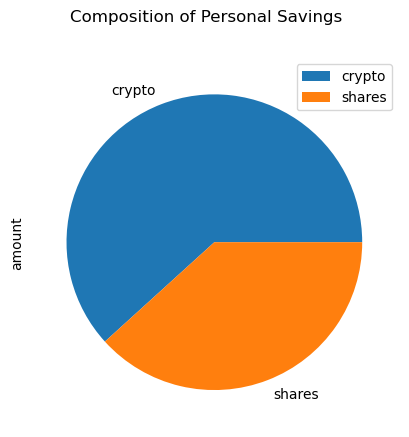

In [23]:
# Plot savings pie chart
df_savings.plot.pie(
    subplots=True,
    title='Composition of Personal Savings',
    y='amount',
    )

In [24]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations for having an emergency fund larger than 3 months of income!')
elif total_savings == emergency_fund:
    print('Congratulations on reaching an emergency fund equal to 3 months of income!')
else:
    print('You need to save $',emergency_fund-total_savings,'to equal to 3 months of income.')

Congratulations for having an emergency fund larger than 3 months of income!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [26]:
# Set the tickers
ticker = ["AGG","SPY"]

In [27]:
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca_api.get_bars(
ticker,
timeframe,
start = start_date,
end=end_date

).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [30]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.


Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 110.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 120.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 130.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 140.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 150.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 160.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 170.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 180.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 190.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 200.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 210.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 220.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 230.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 240.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 250.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 260.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 270.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 280.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 290.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 300.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 310.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 320.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 330.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 340.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 350.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 360.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 370.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 380.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 390.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 400.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 410.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 420.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 430.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 440.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 450.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 460.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 470.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 480.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 490.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003223,0.995438,1.002392,0.995266,0.994439,1.008471,1.006605,0.996182,1.004469,1.003756,...,0.998004,1.001755,0.989908,0.999827,0.993413,0.997689,1.004188,1.004063,0.999158,1.004441
2,1.010617,1.002334,1.007619,0.998931,0.996915,1.010237,1.011894,1.002438,1.011565,1.006659,...,0.998436,0.997464,0.994099,1.004941,0.996813,0.993005,1.011500,1.006492,0.998207,1.001683
3,1.012447,1.005039,1.003114,0.996751,0.990785,1.007432,1.008073,1.010213,1.012134,1.014380,...,1.006775,1.000828,0.985239,0.999226,0.987108,0.994680,1.006488,1.005020,0.995131,0.998686
4,1.012532,1.009090,1.007864,0.999529,0.994215,1.003949,0.991130,1.012859,1.009777,1.025803,...,1.009586,0.995821,0.985893,1.000783,0.982072,0.996769,1.006463,1.008634,0.993060,1.001668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.144219,7.725391,7.384879,10.556020,13.583631,11.230430,11.340285,7.659928,6.882381,5.395046,...,7.413750,4.723113,9.493626,16.967639,8.489119,8.402129,14.951664,5.260659,7.557547,4.268677
7557,7.121301,7.778068,7.425092,10.576627,13.504578,11.209392,11.372120,7.697436,6.847417,5.397854,...,7.378652,4.727351,9.506637,16.860525,8.463058,8.413237,14.927325,5.237477,7.573850,4.256983
7558,7.126338,7.803054,7.423531,10.610644,13.493721,11.204808,11.375734,7.674337,6.803832,5.339449,...,7.326881,4.735638,9.536593,16.759053,8.511987,8.428383,14.998449,5.210335,7.662219,4.255269
7559,7.136838,7.823742,7.457381,10.582410,13.566887,11.218288,11.302728,7.725464,6.794840,5.331137,...,7.319460,4.768130,9.502800,16.869339,8.560263,8.408344,15.036238,5.164791,7.703089,4.257092


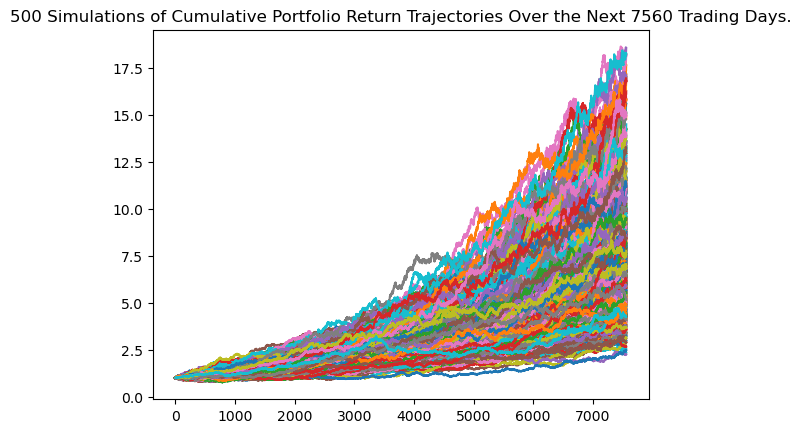

In [32]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

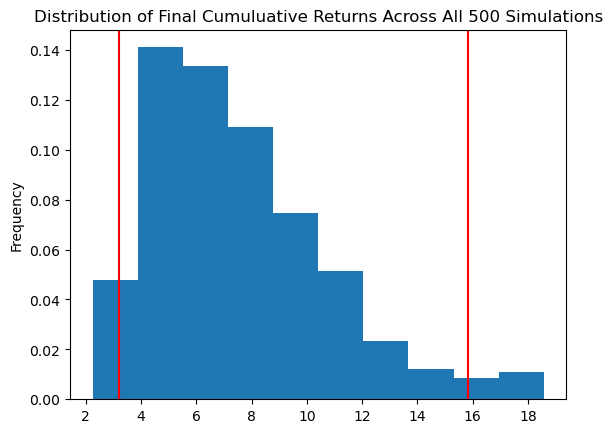

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [34]:
type(MC_thirty_year)

MCForecastTools.MCSimulation

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_sum = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(stat_sum)

count           500.000000
mean              7.544569
std               3.206540
min               2.255548
25%               5.069206
50%               6.970093
75%               9.224976
max              18.566320
95% CI Lower      3.190910
95% CI Upper     15.826099
Name: 7560, dtype: float64


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stat_sum[8]*initial_investment,2)
ci_upper = round(stat_sum[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $63818.2 and $316521.98


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stat_sum[8]*initial_investment,2)
ci_upper = round(stat_sum[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $95727.3 and $474782.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation=500,
    num_trading_days= 252*5
)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.


Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 110.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 120.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 130.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 140.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 150.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 160.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 170.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 180.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 190.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 200.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 210.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 220.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 230.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 240.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 250.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 260.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 270.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 280.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 290.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 300.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 310.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 320.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 330.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 340.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 350.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 360.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 370.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 380.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 390.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 400.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 410.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 420.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 430.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 440.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 450.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 460.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 470.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 480.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 490.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992219,1.001225,0.993223,1.003593,0.993339,0.998684,1.000978,1.003641,1.002872,1.000985,...,1.003352,1.002402,0.994943,0.998015,1.000915,0.997933,1.004011,0.997102,1.004151,1.001037
2,0.992769,1.002086,0.996252,1.002204,0.994721,1.002058,0.997431,1.006478,0.994246,1.012103,...,1.005054,0.996234,0.998162,1.011730,1.004836,0.996788,1.005418,0.988038,1.002721,1.002852
3,1.000216,1.000288,0.996598,1.002136,0.996458,1.003332,1.000130,1.009128,0.991716,1.011611,...,1.006137,0.998510,0.993916,1.010216,0.999220,1.005885,1.014158,0.996341,1.010811,0.994421
4,0.998448,1.011173,0.997962,1.000012,1.003829,0.992741,0.991940,1.015213,0.992387,1.013989,...,1.005139,0.996725,1.000419,1.002818,1.001763,1.003769,1.009880,0.994032,1.010485,0.996017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.052972,1.240310,1.595215,1.600769,1.398436,1.266984,1.096654,1.285003,1.745004,1.576865,...,1.541673,1.290737,0.884164,1.675166,1.647177,0.943703,1.152092,1.321607,1.612958,1.262961
1257,2.050903,1.245766,1.596900,1.602337,1.400860,1.266266,1.093605,1.291498,1.753511,1.577961,...,1.546519,1.293464,0.892082,1.672335,1.657056,0.939342,1.153901,1.322798,1.599284,1.255296
1258,2.045078,1.244418,1.595641,1.585073,1.409949,1.254269,1.098991,1.299939,1.763886,1.574847,...,1.537484,1.287021,0.891753,1.670422,1.671872,0.935707,1.148294,1.323710,1.607574,1.253387
1259,2.046851,1.241085,1.590410,1.587182,1.411324,1.241986,1.102701,1.293004,1.763941,1.590738,...,1.532816,1.286636,0.898702,1.676527,1.664490,0.941116,1.144352,1.317897,1.607685,1.253716


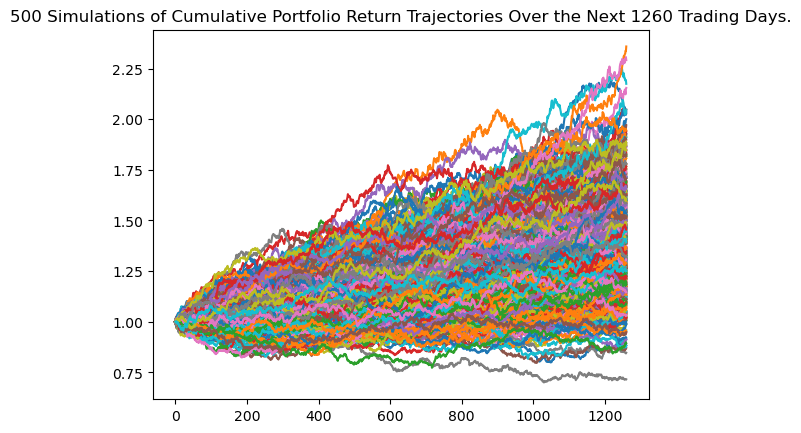

In [40]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()


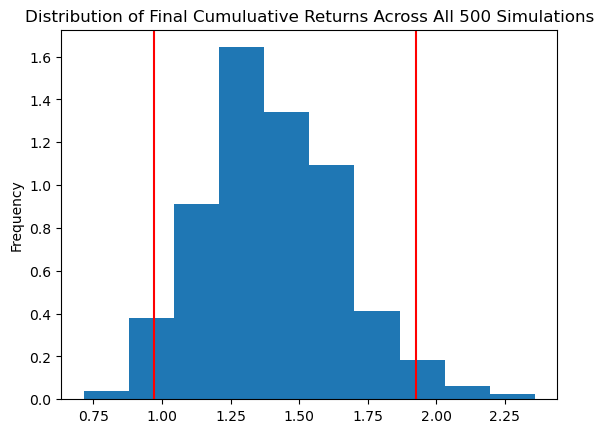

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_sum = MC_five_year.summarize_cumulative_return()

# Print summary statistics
# print(stat_sum)

c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [43]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stat_sum[8]*initial_investment,2)
ci_upper_five = round(stat_sum[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58280.69 and $115602.79


### Ten Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation=500,
    num_trading_days= 252*10
)

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 110.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 120.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 130.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 140.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 150.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 160.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 170.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 180.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 190.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 200.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 210.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 220.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 230.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 240.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 250.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 260.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 270.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 280.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 290.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 300.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 310.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 320.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 330.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 340.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 350.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 360.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 370.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 380.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 390.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 400.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 410.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 420.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 430.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 440.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 450.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 460.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 470.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 480.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

Running Monte Carlo simulation number 490.


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is hi

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010795,0.996494,1.003610,0.996776,0.999656,0.994609,1.007874,0.993758,0.999229,0.993718,...,0.994144,1.007928,1.007769,1.000720,0.995420,1.010384,1.004938,1.000002,0.996270,0.995200
2,1.005533,0.989913,0.996686,0.996631,0.998696,0.999035,1.006690,1.004337,0.992000,0.989627,...,1.004435,1.007097,1.016135,0.999135,0.993827,1.003040,1.003671,0.999176,1.002605,0.994933
3,1.002574,0.994911,1.000959,0.998796,0.998360,1.011005,1.007690,1.008216,0.989261,0.986245,...,1.009974,1.009988,1.017334,1.008570,0.993806,1.004592,0.999570,1.000878,1.003762,0.992451
4,1.011041,1.003814,0.998459,1.005702,0.995933,1.006677,1.008197,1.009105,0.987015,0.991056,...,1.014211,1.001517,1.018230,1.008693,0.990510,1.002713,0.999031,1.012593,1.002224,0.993756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.766252,2.113436,3.133289,1.403907,1.779064,2.278677,2.353634,2.066137,1.204450,1.158504,...,2.292403,1.532221,2.435932,1.745771,2.034091,1.943221,2.162892,1.859390,2.467142,1.284412
2517,1.771984,2.116801,3.099165,1.411027,1.777279,2.278104,2.351470,2.052938,1.205194,1.169283,...,2.292835,1.533897,2.423993,1.743611,2.053171,1.948272,2.161808,1.858947,2.482111,1.291415
2518,1.758400,2.129402,3.074046,1.411763,1.765507,2.279415,2.366575,2.055533,1.213618,1.180277,...,2.292326,1.522816,2.413109,1.742611,2.057855,1.953096,2.158399,1.867011,2.497234,1.300371
2519,1.764153,2.137110,3.102043,1.389151,1.745065,2.277494,2.366460,2.076847,1.208725,1.176751,...,2.306565,1.522123,2.429379,1.734181,2.045806,1.952838,2.142449,1.860779,2.510995,1.309472


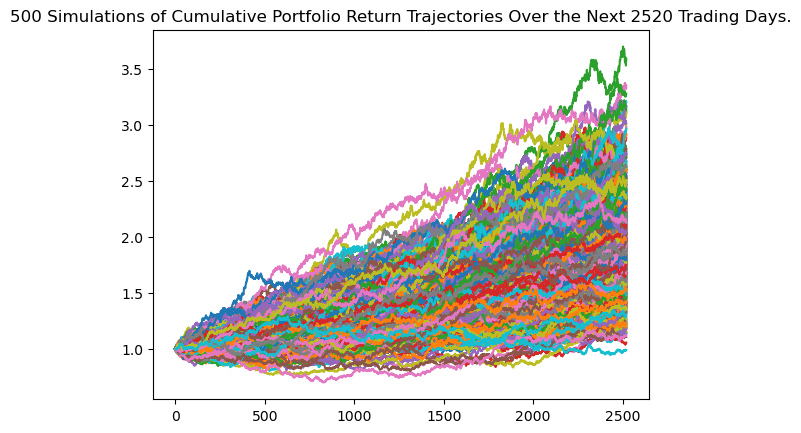

In [46]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

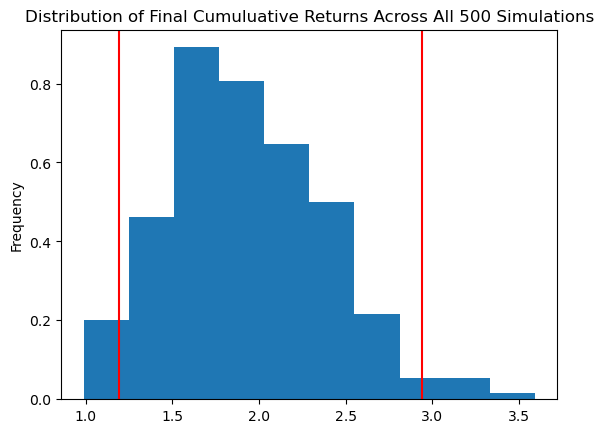

In [47]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_sum = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(stat_sum)

count           500.000000
mean              1.931753
std               0.448155
min               0.989361
25%               1.616481
50%               1.877856
75%               2.221293
max               3.590668
95% CI Lower      1.189209
95% CI Upper      2.940478
Name: 2520, dtype: float64


c:\Users\oakos\Desktop\financial_planning_tools.ipynb\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [49]:
# Set initial investment
initial_investment = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stat_sum[8]*initial_investment,2)
ci_upper_ten = round(stat_sum[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71352.52 and $176428.66
